In [1]:
#import libraries
import pandas_datareader as pdr
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
#define variables
PERIOD = 200
STARTING_BALANCE = 10000

In [3]:
#define time period
START = datetime.datetime(2005, 1, 1)
END = datetime.datetime(2015, 1, 1)
YEARS = (END - START).days / 365.25

In [4]:
#load data into a pandas dataframe
price = pdr.get_data_yahoo('^GSPC', START, END)

price.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,1217.800049,1200.319946,1211.920044,1202.079956,1510800000,1202.079956
2005-01-04,1205.839966,1185.390015,1202.079956,1188.050049,1721000000,1188.050049
2005-01-05,1192.729980,1183.719971,1188.050049,1183.739990,1738900000,1183.739990
2005-01-06,1191.630005,1183.270020,1183.739990,1187.890015,1569100000,1187.890015
2005-01-07,1192.199951,1182.160034,1187.890015,1186.189941,1477900000,1186.189941


In [5]:
#drop redundant columns
price = price.drop(['High', 'Low', 'Volume', 'Adj Close'], 1)

price.head()

,Open,Close
Date,,
2005-01-03,1211.920044,1202.079956
2005-01-04,1202.079956,1188.050049
2005-01-05,1188.050049,1183.739990
2005-01-06,1183.739990,1187.890015
2005-01-07,1187.890015,1186.189941


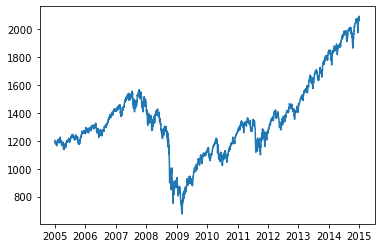

In [6]:
#plot chart
plt.plot(price.Close)
plt.show()

In [8]:
#calculate daily return
price['Return'] = price.Close / price.Open

price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()

price.tail()

,Open,Close,Return,Bench_Bal
Date,,,,
2014-12-24,2083.250000,2081.879883,0.999342,18430.344448
2014-12-26,2084.300049,2088.770020,1.002145,18469.869995
2014-12-29,2087.629883,2090.570068,1.001408,18495.882673
2014-12-30,2088.489990,2080.350098,0.996102,18423.794945
2014-12-31,2082.110107,2058.899902,0.988853,18218.416729


In [13]:
#calculate metrics
bench_return = round(((price.Bench_Bal[-1] / price.Bench_Bal[0]) - 1) * 100, 2)
bench_cagr = round((((price.Bench_Bal[-1] / price.Bench_Bal[0]) ** (1/YEARS))-1) * 100, 2)

print(bench_return)
print(bench_cagr)

83.68
6.27


In [16]:
#calculate drawdown
price['Bench_Peak'] = price.Bench_Bal.cummax()

price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak

bench_dd = round((((price.Bench_DD / price.Bench_Peak).min()) * 100), 2)

bench_dd

-52.29